# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam

### 1.1 Generating dataset

In [18]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [19]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [20]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [21]:
no_training_epochs = 5

### 1.3 Data examination

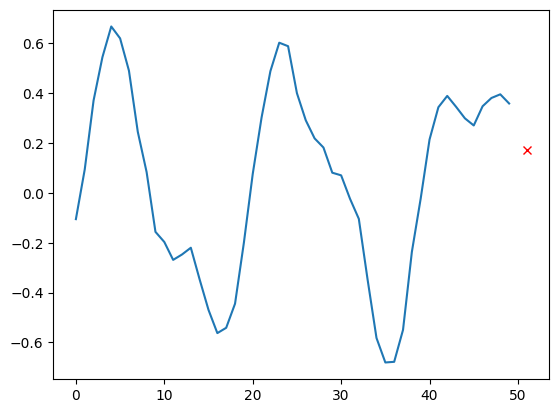

In [22]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [28]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [52]:
# Model building
learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [53]:
model_linear.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


In [55]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

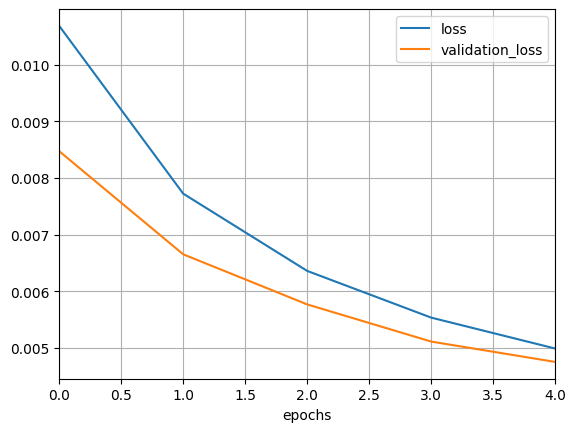

In [56]:
plot_function(history_linear)

In [37]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.014284120872616768
Test MSE:  0.014284120872616768


### 1.5 Simple RNN Model

In [57]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [58]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [59]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2566 - mean_squared_error: 0.2566 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0649 - val_mean_squared_error: 0.0649
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.0468 - val_mean_squared_error: 0.0468


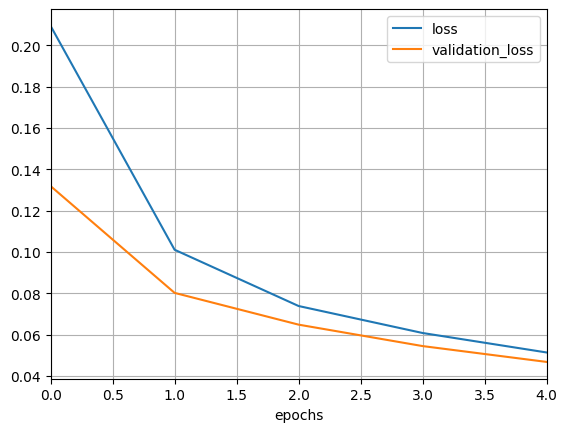

In [60]:
plot_function(history_simple_rnn)

### 1.6 Deep RNN Model

In [67]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [68]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [69]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


In [70]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003299760865047574
Test MSE:  0.003299760865047574


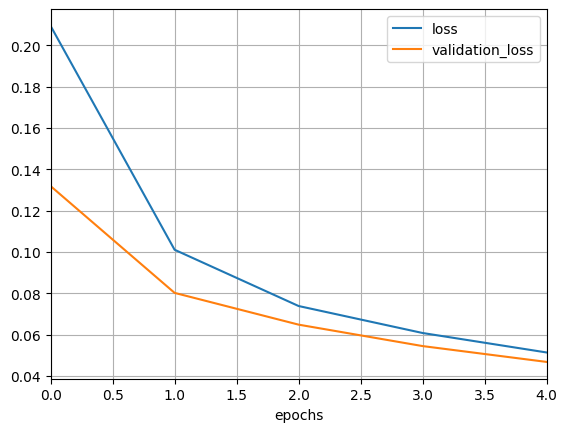

In [71]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written review, classify if the movie if good or bad

### 2.0 - Import libraries

In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()
print(X_train.shape, X_test.shape)

(25000,) (25000,)


### 2.2 - Dataset examination

In [3]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [4]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [5]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [6]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [20]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [17]:
optimizer = Adam(learning_rate = 0.001)

In [18]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/embedding_3_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/Users/dmitriisemenov/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/var/folders/q9/gzpc690x0ggf9m7__l7c7ybc0000gn/T/ipykernel_81662/791172324.py", line 1, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 57, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/layer.py", line 909, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/operation.py", line 52, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/models/sequential.py", line 221, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/models/functional.py", line 183, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/models/functional.py", line 643, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/layer.py", line 909, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/operation.py", line 52, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py", line 140, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 5442, in take

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 2222, in take

indices[29,31] = 85011 is not in [0, 25000)
	 [[{{node sequential_3_1/embedding_3_1/GatherV2}}]] [Op:__inference_multi_step_on_iterator_9388]

In [319]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6951086521148682
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

In [104]:
######################################################
#                      RNN core                      #
#                 Test accuracy 50%                  #
######################################################